In [1]:
import sklearn
from tensorflow import keras
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot  as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn import ensemble
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn import linear_model
from sklearn.inspection import permutation_importance
import seaborn as sns
import heapq
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.model_selection import RandomizedSearchCV
from matplotlib_venn import venn3
from sklearn.model_selection import cross_val_score, cross_validate, validation_curve, learning_curve

In [3]:
df = pd.read_csv(r'C:\Users\geerv\Documents\SKripsi\2halide.csv')
df = df.drop(['a_atom','b1_atom','composition','x_atom','b2_atom','id'], axis =1)
df

,distance_a,distance_b1,distance_b2,cubic,ortho,eleneg_a,eleneg_b1,eleneg_b2,eleneg_x,hoe_a,...,rp_a,rp_b1,rp_b2,rp_x,rs_a,rs_b1,rs_b2,rs_x,ind_gap,heat_of_formation
0,3.870604,2.912570,2.555464,1,0,0.79,1.93,1.61,2.96,-2.0862,...,2.60,1.33,0.905,0.62,1.71,1.045,0.77,0.580,1.0274,-1.240558
1,3.925597,2.858240,2.692150,1,0,0.79,1.93,2.18,2.96,-2.0862,...,2.60,1.33,0.745,0.62,1.71,1.045,0.67,0.580,0.7810,-1.012833
2,4.059806,2.856817,2.884582,1,0,0.79,1.93,2.02,2.96,-2.0862,...,2.60,1.33,1.077,0.62,1.71,1.045,0.92,0.580,1.1399,-1.145090
3,3.887140,2.881822,2.612114,1,0,0.79,1.93,1.81,2.96,-2.0862,...,2.60,1.33,0.935,0.62,1.71,1.045,0.76,0.580,0.0000,-1.112540
4,3.966402,2.870028,2.738541,1,0,0.79,1.93,1.78,2.96,-2.0862,...,2.60,1.33,1.110,0.62,1.71,1.045,0.94,0.580,0.1818,-1.162859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,4.036116,3.440632,2.907324,0,1,0.82,2.04,2.18,2.66,-2.2327,...,2.43,1.22,0.745,0.83,1.67,1.015,0.67,0.755,1.0584,-0.814923
536,4.097096,3.486896,3.118286,0,1,0.82,2.04,2.02,2.66,-2.2327,...,2.43,1.22,1.077,0.83,1.67,1.015,0.92,0.755,1.0077,-0.943624
537,4.024081,3.456462,2.850256,0,1,0.82,2.04,1.81,2.66,-2.2327,...,2.43,1.22,0.935,0.83,1.67,1.015,0.76,0.755,0.7727,-0.877934
538,4.057470,3.475991,2.977066,0,1,0.82,2.04,1.78,2.66,-2.2327,...,2.43,1.22,1.110,0.83,1.67,1.015,0.94,0.755,1.1472,-0.940822


In [4]:
col = df.columns
print(col)

Index(['distance_a', 'distance_b1', 'distance_b2', 'cubic', 'ortho',
       'eleneg_a', 'eleneg_b1', 'eleneg_b2', 'eleneg_x', 'hoe_a', 'hoe_b1',
       'hoe_b2', 'hoe_x', 'ionenergy_a', 'ionenergy_b1', 'ionenergy_b2',
       'ionenergy_x', 'luep_a', 'luep_b1', 'luep_b2', 'luep_x', 'rd_a',
       'rd_b1', 'rd_b2', 'rd_x', 'rp_a', 'rp_b1', 'rp_b2', 'rp_x', 'rs_a',
       'rs_b1', 'rs_b2', 'rs_x', 'ind_gap', 'heat_of_formation'],
      dtype='object')


In [5]:
move = df.pop("heat_of_formation")
df.insert(33, "hear_of_formation", move)
df

,distance_a,distance_b1,distance_b2,cubic,ortho,eleneg_a,eleneg_b1,eleneg_b2,eleneg_x,hoe_a,...,rp_a,rp_b1,rp_b2,rp_x,rs_a,rs_b1,rs_b2,rs_x,hear_of_formation,ind_gap
0,3.870604,2.912570,2.555464,1,0,0.79,1.93,1.61,2.96,-2.0862,...,2.60,1.33,0.905,0.62,1.71,1.045,0.77,0.580,-1.240558,1.0274
1,3.925597,2.858240,2.692150,1,0,0.79,1.93,2.18,2.96,-2.0862,...,2.60,1.33,0.745,0.62,1.71,1.045,0.67,0.580,-1.012833,0.7810
2,4.059806,2.856817,2.884582,1,0,0.79,1.93,2.02,2.96,-2.0862,...,2.60,1.33,1.077,0.62,1.71,1.045,0.92,0.580,-1.145090,1.1399
3,3.887140,2.881822,2.612114,1,0,0.79,1.93,1.81,2.96,-2.0862,...,2.60,1.33,0.935,0.62,1.71,1.045,0.76,0.580,-1.112540,0.0000
4,3.966402,2.870028,2.738541,1,0,0.79,1.93,1.78,2.96,-2.0862,...,2.60,1.33,1.110,0.62,1.71,1.045,0.94,0.580,-1.162859,0.1818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,4.036116,3.440632,2.907324,0,1,0.82,2.04,2.18,2.66,-2.2327,...,2.43,1.22,0.745,0.83,1.67,1.015,0.67,0.755,-0.814923,1.0584
536,4.097096,3.486896,3.118286,0,1,0.82,2.04,2.02,2.66,-2.2327,...,2.43,1.22,1.077,0.83,1.67,1.015,0.92,0.755,-0.943624,1.0077
537,4.024081,3.456462,2.850256,0,1,0.82,2.04,1.81,2.66,-2.2327,...,2.43,1.22,0.935,0.83,1.67,1.015,0.76,0.755,-0.877934,0.7727
538,4.057470,3.475991,2.977066,0,1,0.82,2.04,1.78,2.66,-2.2327,...,2.43,1.22,1.110,0.83,1.67,1.015,0.94,0.755,-0.940822,1.1472


In [6]:
col = df.columns
j = col.size
i=0
while i < j:
    print(i, " : ", col[i])
    i+=1

0  :  distance_a
1  :  distance_b1
2  :  distance_b2
3  :  cubic
4  :  ortho
5  :  eleneg_a
6  :  eleneg_b1
7  :  eleneg_b2
8  :  eleneg_x
9  :  hoe_a
10  :  hoe_b1
11  :  hoe_b2
12  :  hoe_x
13  :  ionenergy_a
14  :  ionenergy_b1
15  :  ionenergy_b2
16  :  ionenergy_x
17  :  luep_a
18  :  luep_b1
19  :  luep_b2
20  :  luep_x
21  :  rd_a
22  :  rd_b1
23  :  rd_b2
24  :  rd_x
25  :  rp_a
26  :  rp_b1
27  :  rp_b2
28  :  rp_x
29  :  rs_a
30  :  rs_b1
31  :  rs_b2
32  :  rs_x
33  :  hear_of_formation
34  :  ind_gap


In [7]:
dfmap = df[[ 'distance_a','distance_b1','distance_b2','eleneg_a', 'ionenergy_a', 'hoe_a', 'luep_a', 'rs_a', 'rp_a', 'rd_a',
          'eleneg_b1', 'ionenergy_b1', 'hoe_b1', 'luep_b1', 'rs_b1', 'rp_b1', 'rd_b1',
          'eleneg_b2', 'ionenergy_b2', 'hoe_b2', 'luep_b2', 'rs_b2', 'rp_b2', 'rd_b2',
          'eleneg_x', 'ionenergy_x', 'hoe_x', 'luep_x', 'rs_x', 'rp_x', 'rd_x',
         'cubic','ortho','hear_of_formation','ind_gap'
         ]]
dfmap

,distance_a,distance_b1,distance_b2,eleneg_a,ionenergy_a,hoe_a,luep_a,rs_a,rp_a,rd_a,...,ionenergy_x,hoe_x,luep_x,rs_x,rp_x,rd_x,cubic,ortho,hear_of_formation,ind_gap
0,3.870604,2.912570,2.555464,0.79,3.8939,-2.0862,-2.0862,1.71,2.60,0.00,...,11.8138,-7.8591,-7.8591,0.580,0.62,0.143,1,0,-1.240558,1.0274
1,3.925597,2.858240,2.692150,0.79,3.8939,-2.0862,-2.0862,1.71,2.60,0.00,...,11.8138,-7.8591,-7.8591,0.580,0.62,0.143,1,0,-1.012833,0.7810
2,4.059806,2.856817,2.884582,0.79,3.8939,-2.0862,-2.0862,1.71,2.60,0.00,...,11.8138,-7.8591,-7.8591,0.580,0.62,0.143,1,0,-1.145090,1.1399
3,3.887140,2.881822,2.612114,0.79,3.8939,-2.0862,-2.0862,1.71,2.60,0.00,...,11.8138,-7.8591,-7.8591,0.580,0.62,0.143,1,0,-1.112540,0.0000
4,3.966402,2.870028,2.738541,0.79,3.8939,-2.0862,-2.0862,1.71,2.60,0.00,...,11.8138,-7.8591,-7.8591,0.580,0.62,0.143,1,0,-1.162859,0.1818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,4.036116,3.440632,2.907324,0.82,4.1771,-2.2327,-2.2327,1.67,2.43,0.71,...,10.4513,-7.0851,-7.0851,0.755,0.83,0.315,0,1,-0.814923,1.0584
536,4.097096,3.486896,3.118286,0.82,4.1771,-2.2327,-2.2327,1.67,2.43,0.71,...,10.4513,-7.0851,-7.0851,0.755,0.83,0.315,0,1,-0.943624,1.0077
537,4.024081,3.456462,2.850256,0.82,4.1771,-2.2327,-2.2327,1.67,2.43,0.71,...,10.4513,-7.0851,-7.0851,0.755,0.83,0.315,0,1,-0.877934,0.7727
538,4.057470,3.475991,2.977066,0.82,4.1771,-2.2327,-2.2327,1.67,2.43,0.71,...,10.4513,-7.0851,-7.0851,0.755,0.83,0.315,0,1,-0.940822,1.1472


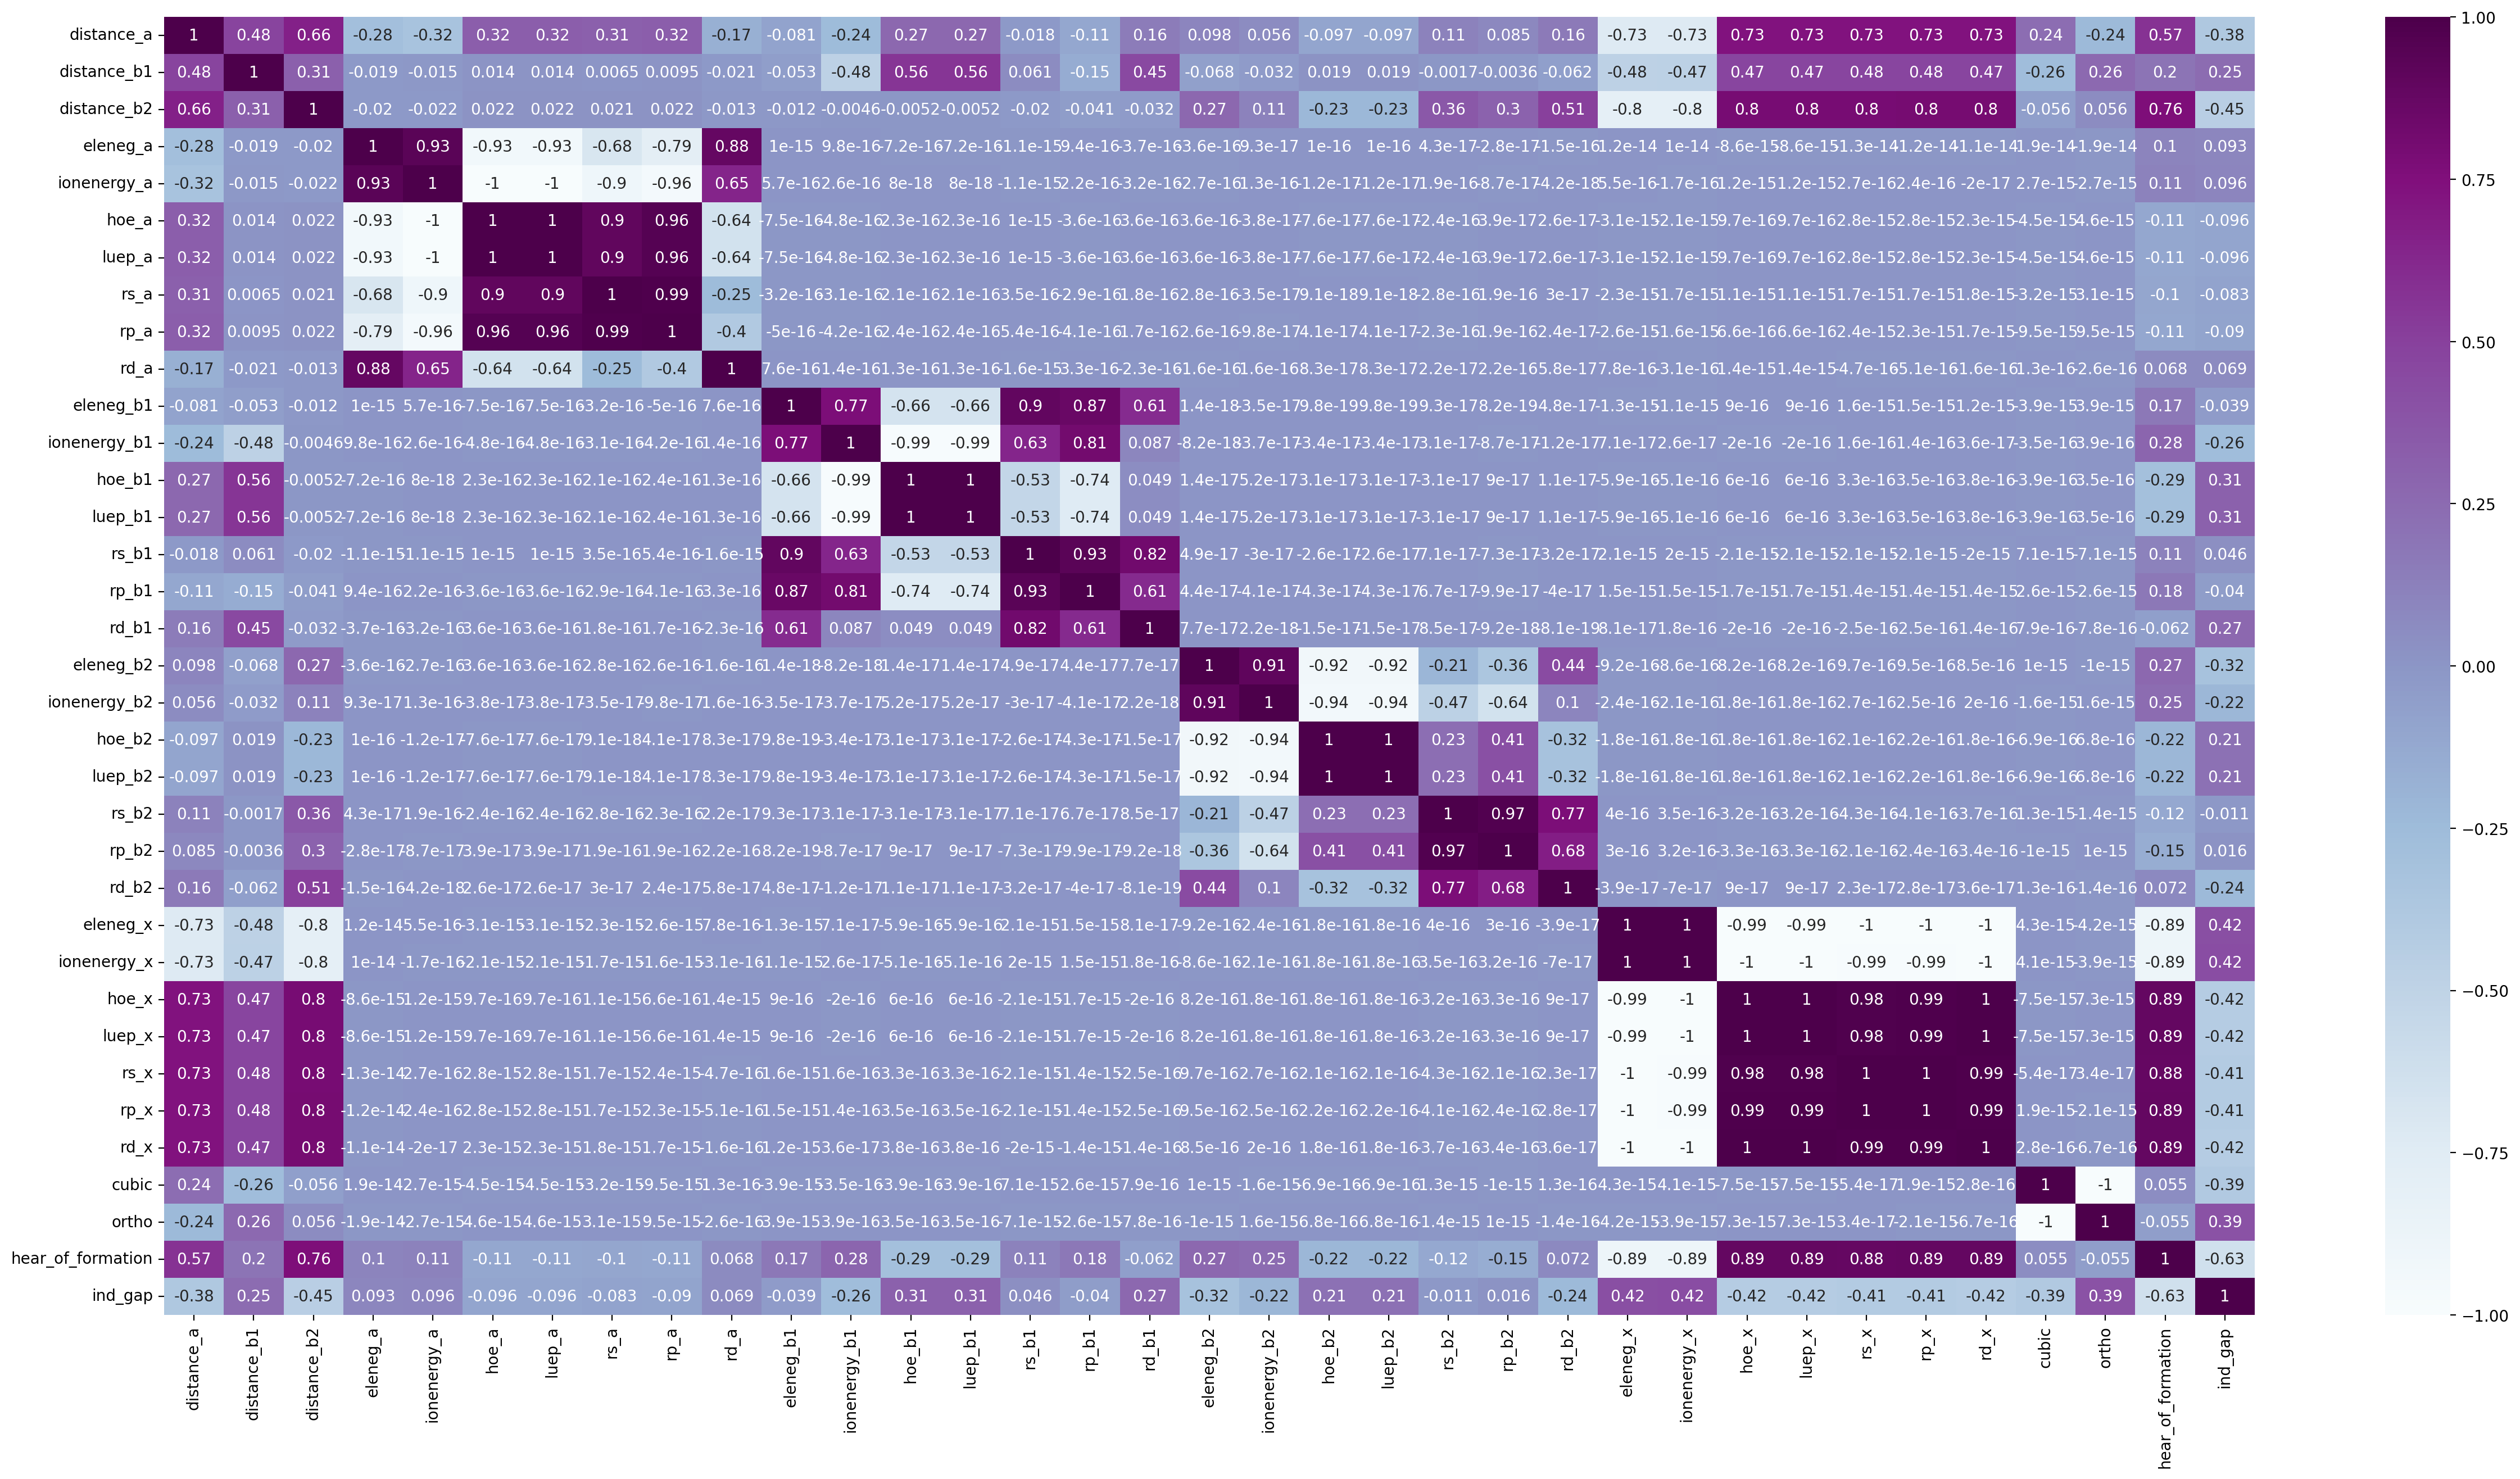

In [8]:
corrmat = dfmap.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,15),dpi=200)
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="BuPu")

In [9]:
df_scale= df
df_scale

,distance_a,distance_b1,distance_b2,cubic,ortho,eleneg_a,eleneg_b1,eleneg_b2,eleneg_x,hoe_a,...,rp_a,rp_b1,rp_b2,rp_x,rs_a,rs_b1,rs_b2,rs_x,hear_of_formation,ind_gap
0,3.870604,2.912570,2.555464,1,0,0.79,1.93,1.61,2.96,-2.0862,...,2.60,1.33,0.905,0.62,1.71,1.045,0.77,0.580,-1.240558,1.0274
1,3.925597,2.858240,2.692150,1,0,0.79,1.93,2.18,2.96,-2.0862,...,2.60,1.33,0.745,0.62,1.71,1.045,0.67,0.580,-1.012833,0.7810
2,4.059806,2.856817,2.884582,1,0,0.79,1.93,2.02,2.96,-2.0862,...,2.60,1.33,1.077,0.62,1.71,1.045,0.92,0.580,-1.145090,1.1399
3,3.887140,2.881822,2.612114,1,0,0.79,1.93,1.81,2.96,-2.0862,...,2.60,1.33,0.935,0.62,1.71,1.045,0.76,0.580,-1.112540,0.0000
4,3.966402,2.870028,2.738541,1,0,0.79,1.93,1.78,2.96,-2.0862,...,2.60,1.33,1.110,0.62,1.71,1.045,0.94,0.580,-1.162859,0.1818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,4.036116,3.440632,2.907324,0,1,0.82,2.04,2.18,2.66,-2.2327,...,2.43,1.22,0.745,0.83,1.67,1.015,0.67,0.755,-0.814923,1.0584
536,4.097096,3.486896,3.118286,0,1,0.82,2.04,2.02,2.66,-2.2327,...,2.43,1.22,1.077,0.83,1.67,1.015,0.92,0.755,-0.943624,1.0077
537,4.024081,3.456462,2.850256,0,1,0.82,2.04,1.81,2.66,-2.2327,...,2.43,1.22,0.935,0.83,1.67,1.015,0.76,0.755,-0.877934,0.7727
538,4.057470,3.475991,2.977066,0,1,0.82,2.04,1.78,2.66,-2.2327,...,2.43,1.22,1.110,0.83,1.67,1.015,0.94,0.755,-0.940822,1.1472


In [10]:
target = df.loc[:, df.columns.intersection(['ind_gap'])]
target

,ind_gap
0,1.0274
1,0.7810
2,1.1399
3,0.0000
4,0.1818
...,...
535,1.0584
536,1.0077
537,0.7727
538,1.1472


In [11]:
scaler = StandardScaler()
df1 = scaler.fit_transform(df_scale)
df1 = pd.DataFrame(df1, columns = col)
df =df1
df

,distance_a,distance_b1,distance_b2,cubic,ortho,eleneg_a,eleneg_b1,eleneg_b2,eleneg_x,hoe_a,...,rp_a,rp_b1,rp_b2,rp_x,rs_a,rs_b1,rs_b2,rs_x,hear_of_formation,ind_gap
0,-0.324756,-0.256802,-1.004080,1.0,-1.0,-1.414214,-0.408622,-1.552769,0.162221,1.315731,...,1.113912,0.620869,-0.385122,-0.251101,0.964562,0.241052,-0.479022,-0.297384,-0.683406,0.140693
1,-0.100284,-0.484212,-0.353381,1.0,-1.0,-1.414214,-0.408622,1.413974,0.162221,1.315731,...,1.113912,0.620869,-1.719840,-0.251101,0.964562,0.241052,-1.543514,-0.297384,0.288188,-0.160657
2,0.447536,-0.490168,0.562698,1.0,-1.0,-1.414214,-0.408622,0.581204,0.162221,1.315731,...,1.113912,0.620869,1.049700,-0.251101,0.964562,0.241052,1.117717,-0.297384,-0.276088,0.278282
3,-0.257259,-0.385504,-0.734395,1.0,-1.0,-1.414214,-0.408622,-0.511807,0.162221,1.315731,...,1.113912,0.620869,-0.134862,-0.251101,0.964562,0.241052,-0.585471,-0.297384,-0.137212,-1.115829
4,0.066276,-0.434871,-0.132535,1.0,-1.0,-1.414214,-0.408622,-0.667951,0.162221,1.315731,...,1.113912,0.620869,1.324986,-0.251101,0.964562,0.241052,1.330616,-0.297384,-0.351901,-0.893485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.350837,1.953509,0.670962,-1.0,1.0,0.707107,0.007567,1.413974,-1.297771,-0.208824,...,0.197630,-0.277757,-1.719840,1.330835,0.413384,-0.026784,-1.543514,1.346052,1.132575,0.178606
536,0.599748,2.147157,1.675255,-1.0,1.0,0.707107,0.007567,0.581204,-1.297771,-0.208824,...,0.197630,-0.277757,1.049700,1.330835,0.413384,-0.026784,1.117717,1.346052,0.583470,0.116600
537,0.301712,2.019769,0.399288,-1.0,1.0,0.707107,0.007567,-0.511807,-1.297771,-0.208824,...,0.197630,-0.277757,-0.134862,1.330835,0.413384,-0.026784,-0.585471,1.346052,0.863737,-0.170808
538,0.438001,2.101512,1.002972,-1.0,1.0,0.707107,0.007567,-0.667951,-1.297771,-0.208824,...,0.197630,-0.277757,1.324986,1.330835,0.413384,-0.026784,1.330616,1.346052,0.595422,0.287210


# Full Features (35)

In [12]:
df_n=np.array(df)
data_train, data_test = train_test_split(df_n, test_size=0.2)
x_train=data_train[:,:(34)]
x_test=data_test[:,:(34)]
y_train=data_train[:,(34)]
y_test=data_test[:,(34)]

In [13]:
#gbr
params = {'n_estimators':2100, 'max_depth': 5, 'min_samples_split': 5,'max_features':0.8,'learning_rate': 0.1, 'loss': 'ls','random_state':0,'subsample': 0.85}
gbr = ensemble.GradientBoostingRegressor(**params)
gbr.fit(x_train, y_train)
gbr_train_pred = gbr.predict(x_train)
gbr_test_pred = gbr.predict(x_test)
print("Model evaluation - Test Set:")
print('r^2:',r2_score(y_test, gbr_test_pred))
print('RSE', mean_squared_error(y_test, gbr_test_pred))
print('RAE', mean_absolute_error(y_test, gbr_test_pred))
print('RME:',np.sqrt(mean_squared_error(y_test,gbr_test_pred)))
RMSE_GBR = mean_squared_error(y_test, gbr_test_pred)
R_GBR = r2_score(y_test, gbr_test_pred)
RME_GBR = np.sqrt(mean_squared_error(y_test,gbr_test_pred))

Model evaluation - Test Set:
r^2: 0.8134137086689588
RSE 0.17162699050656474
RAE 0.2876544734479516
RME: 0.41427888011165226


In [14]:
#SVR
svr = SVR(C= 100, kernel='poly', gamma=1,
          epsilon=0.01)
svr.fit(x_train, y_train)
svr_train_pred = svr.predict(x_train)
svr_test_pred_9 = svr.predict(x_test)

print("Model evaluation - Test Set:")
print('r^2:',r2_score(y_test, svr_test_pred_9))
print('RSE', mean_squared_error(y_test, svr_test_pred_9))
print('RAE', mean_absolute_error(y_test, svr_test_pred_9))
print('RME:',np.sqrt(mean_squared_error(y_test,svr_test_pred_9)))
RMSE_SVR = mean_squared_error(y_test, svr_test_pred_9)
R_SVR = r2_score(y_test, svr_test_pred_9)
RME_SVR = np.sqrt(mean_squared_error(y_test,svr_test_pred_9))

Model evaluation - Test Set:
r^2: 0.9241882510430443
RSE 0.0697336456269277
RAE 0.16437005940395708
RME: 0.2640712889106419


In [15]:
#RF
rf=RandomForestRegressor(n_estimators = 1800, min_samples_split= 4,
                         min_samples_leaf= 1, max_depth= 8, bootstrap= False, max_features = 'sqrt')
rf.fit(x_train, y_train)
rf_train_pred=rf.predict(x_train)
rf_test_pred9=rf.predict(x_test)
print("Model evaluation - Test Set:")
print('r^2:',r2_score(y_test, rf_test_pred9))
print('RSE', mean_squared_error(y_test, rf_test_pred9))
print('RAE', mean_absolute_error(y_test, rf_test_pred9))
print('RME:',np.sqrt(mean_squared_error(y_test,rf_test_pred9)))
RMSE_RF = mean_squared_error(y_test, rf_test_pred9)
R_RF = r2_score(y_test, rf_test_pred9)
RME_RF = np.sqrt(mean_squared_error(y_test,rf_test_pred9))

Model evaluation - Test Set:
r^2: 0.821218516305013
RSE 0.16444792265274225
RAE 0.26837810636223275
RME: 0.40552179060161764


In [16]:
#MLP
mlp_hw = MLPRegressor(solver='adam',hidden_layer_sizes=(50,100,50),activation='relu',alpha=0.05,
                     tol=1e-6,max_iter=5000,learning_rate='adaptive',
                     learning_rate_init=0.01,random_state=120)
mlp_hw.fit(x_train, y_train)
pred1_train = mlp_hw.predict(x_train)
mlp_pred = mlp_hw.predict((x_test))

print("Model evaluation - Test Set:")
print('r^2:',r2_score(y_test, mlp_pred))
print('RMSE', mean_squared_error(y_test, mlp_pred))
print('RAE', mean_absolute_error(y_test, mlp_pred))
print('RME:',np.sqrt(mean_squared_error(y_test,mlp_pred)))
RMSE_MLP = mean_squared_error(y_test, mlp_pred)
R_MLP = r2_score(y_test, mlp_pred)
RME_MLP = np.sqrt(mean_squared_error(y_test,mlp_pred))

Model evaluation - Test Set:
r^2: 0.9183245090528828
RMSE 0.07512727011937706
RAE 0.20753004305446277
RME: 0.27409354264443564


# Model - Validation

In [17]:
def validation_hist(pred,title):
    print(pd.DataFrame({'source' : ['data uji', 'prediksi'], 'rata - rata E':[pred.mean(), y_test.mean()]}
                  ))

    fig,ax=plt.subplots(nrows=2,sharex=True,sharey=True,figsize=(8,8))
    plt.title(title)
    sns.histplot(pred,ax=ax[0],color='g',label='validation')
    sns.histplot(y_test,ax=ax[1],color='r',label='test')
    ax[0].legend(loc=0)
    ax[1].legend(loc=0)
    plt.show()

     source  rata - rata E
0  data uji       0.006786
1  prediksi      -0.000475


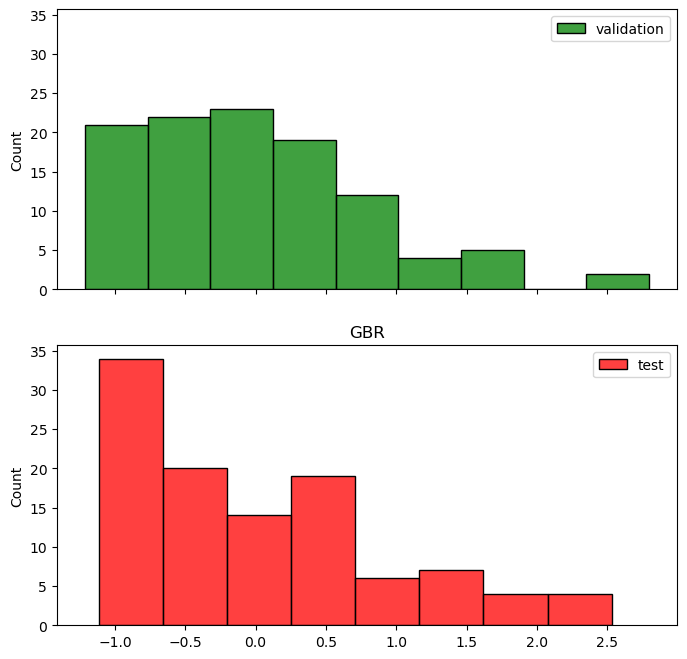

In [18]:
validation_hist(gbr_test_pred, 'GBR')

     source  rata - rata E
0  data uji      -0.026303
1  prediksi      -0.000475


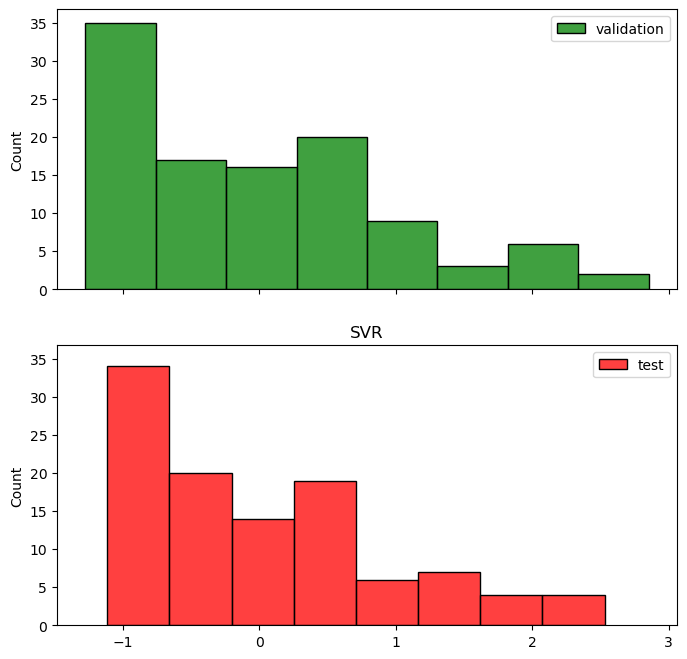

In [19]:
validation_hist(svr_test_pred_9, 'SVR')

     source  rata - rata E
0  data uji       0.018652
1  prediksi      -0.000475


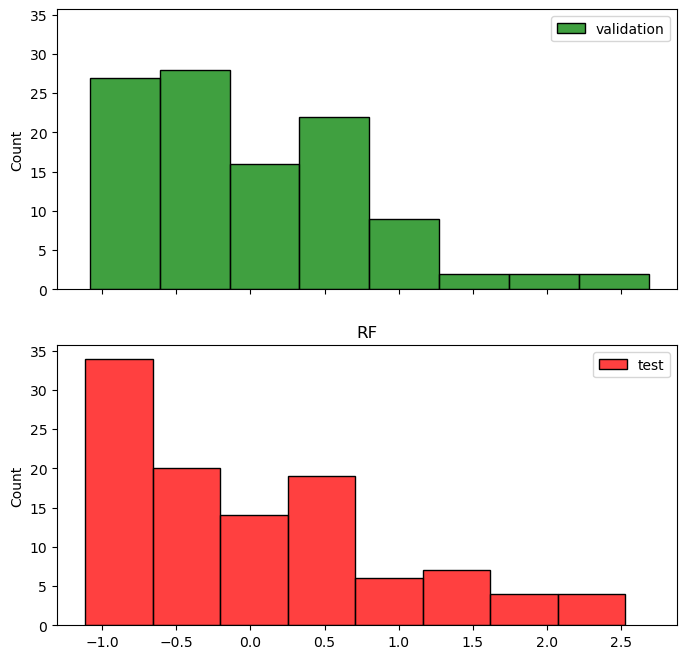

In [20]:
validation_hist(rf_test_pred9, "RF")

     source  rata - rata E
0  data uji      -0.110327
1  prediksi      -0.000475


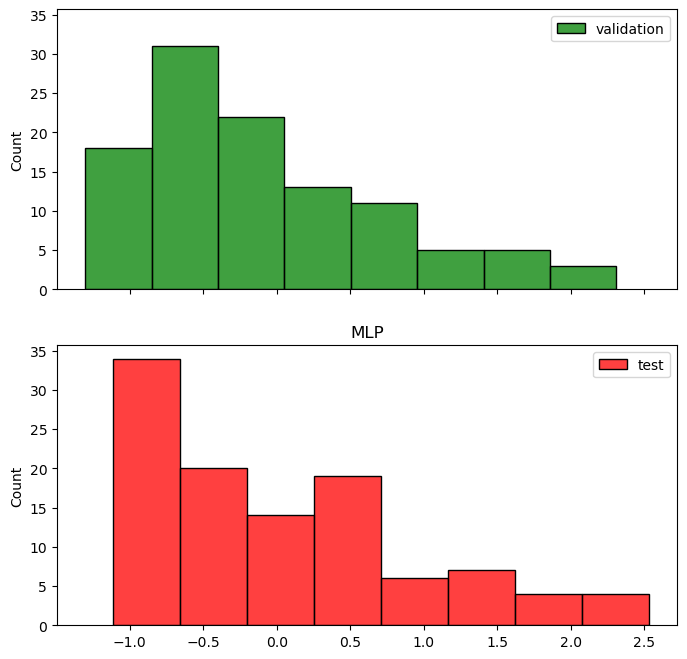

In [21]:
validation_hist(mlp_pred, 'MLP')

# Feature Selection - Lasso

In [895]:
df

,distance_a,distance_b1,distance_b2,cubic,ortho,eleneg_a,eleneg_b1,eleneg_b2,eleneg_x,hoe_a,...,rp_a,rp_b1,rp_b2,rp_x,rs_a,rs_b1,rs_b2,rs_x,hear_of_formation,ind_gap
0,-0.324756,-0.256802,-1.004080,1.0,-1.0,-1.414214,-0.408622,-1.552769,0.162221,1.315731,...,1.113912,0.620869,-0.385122,-0.251101,0.964562,0.241052,-0.479022,-0.297384,-0.683406,0.140693
1,-0.100284,-0.484212,-0.353381,1.0,-1.0,-1.414214,-0.408622,1.413974,0.162221,1.315731,...,1.113912,0.620869,-1.719840,-0.251101,0.964562,0.241052,-1.543514,-0.297384,0.288188,-0.160657
2,0.447536,-0.490168,0.562698,1.0,-1.0,-1.414214,-0.408622,0.581204,0.162221,1.315731,...,1.113912,0.620869,1.049700,-0.251101,0.964562,0.241052,1.117717,-0.297384,-0.276088,0.278282
3,-0.257259,-0.385504,-0.734395,1.0,-1.0,-1.414214,-0.408622,-0.511807,0.162221,1.315731,...,1.113912,0.620869,-0.134862,-0.251101,0.964562,0.241052,-0.585471,-0.297384,-0.137212,-1.115829
4,0.066276,-0.434871,-0.132535,1.0,-1.0,-1.414214,-0.408622,-0.667951,0.162221,1.315731,...,1.113912,0.620869,1.324986,-0.251101,0.964562,0.241052,1.330616,-0.297384,-0.351901,-0.893485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.350837,1.953509,0.670962,-1.0,1.0,0.707107,0.007567,1.413974,-1.297771,-0.208824,...,0.197630,-0.277757,-1.719840,1.330835,0.413384,-0.026784,-1.543514,1.346052,1.132575,0.178606
536,0.599748,2.147157,1.675255,-1.0,1.0,0.707107,0.007567,0.581204,-1.297771,-0.208824,...,0.197630,-0.277757,1.049700,1.330835,0.413384,-0.026784,1.117717,1.346052,0.583470,0.116600
537,0.301712,2.019769,0.399288,-1.0,1.0,0.707107,0.007567,-0.511807,-1.297771,-0.208824,...,0.197630,-0.277757,-0.134862,1.330835,0.413384,-0.026784,-0.585471,1.346052,0.863737,-0.170808
538,0.438001,2.101512,1.002972,-1.0,1.0,0.707107,0.007567,-0.667951,-1.297771,-0.208824,...,0.197630,-0.277757,1.324986,1.330835,0.413384,-0.026784,1.330616,1.346052,0.595422,0.287210


In [896]:
names = np.array(df.columns[0:-1])
lasso = Lasso(alpha=0.001, max_iter=10000)
lasso.fit(x_train, y_train)
lasso_coef = np.abs(lasso.coef_)
#lasso_n = np.array(lasso_coef)
#len(lasso_n)

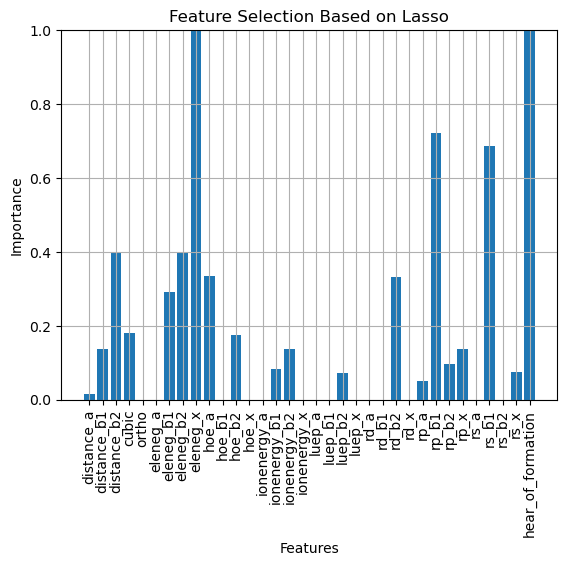

In [897]:
plt.bar(names.astype('str'), lasso_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0,1)
plt.show()

In [898]:
feature_subset=np.array(names)[lasso_coef>0.08]
print("Selected Feature Columns: {}".format(feature_subset))

print()
# Adding the target to the list of feaatures. 
feature_subset_total=np.append(feature_subset,'ind_gap')
print("Columns in new Dataframe: {}".format(feature_subset_total))

len(feature_subset_total)

Selected Feature Columns: ['distance_b1' 'distance_b2' 'cubic' 'eleneg_b1' 'eleneg_b2' 'eleneg_x'
 'hoe_a' 'hoe_b2' 'ionenergy_b1' 'ionenergy_b2' 'rd_b2' 'rp_b1' 'rp_b2'
 'rp_x' 'rs_b1' 'hear_of_formation']

Columns in new Dataframe: ['distance_b1' 'distance_b2' 'cubic' 'eleneg_b1' 'eleneg_b2' 'eleneg_x'
 'hoe_a' 'hoe_b2' 'ionenergy_b1' 'ionenergy_b2' 'rd_b2' 'rp_b1' 'rp_b2'
 'rp_x' 'rs_b1' 'hear_of_formation' 'ind_gap']


17

In [899]:
for i in range (len(feature_subset)):
    print(f"{i} : {feature_subset[i]}")

0 : distance_b1
1 : distance_b2
2 : cubic
3 : eleneg_b1
4 : eleneg_b2
5 : eleneg_x
6 : hoe_a
7 : hoe_b2
8 : ionenergy_b1
9 : ionenergy_b2
10 : rd_b2
11 : rp_b1
12 : rp_b2
13 : rp_x
14 : rs_b1
15 : hear_of_formation


In [900]:
df_reduced_lasso = df[feature_subset_total]
df_reduced_lasso

,distance_b1,distance_b2,cubic,eleneg_b1,eleneg_b2,eleneg_x,hoe_a,hoe_b2,ionenergy_b1,ionenergy_b2,rd_b2,rp_b1,rp_b2,rp_x,rs_b1,hear_of_formation,ind_gap
0,-0.256802,-1.004080,1.0,-0.408622,-1.552769,0.162221,1.315731,0.891197,0.235396,-0.834750,-1.636447,0.620869,-0.385122,-0.251101,0.241052,-0.683406,0.140693
1,-0.484212,-0.353381,1.0,-0.408622,1.413974,0.162221,1.315731,-1.274509,0.235396,1.691556,-0.592623,0.620869,-1.719840,-0.251101,0.241052,0.288188,-0.160657
2,-0.490168,0.562698,1.0,-0.408622,0.581204,0.162221,1.315731,-0.729724,0.235396,0.028677,1.313198,0.620869,1.049700,-0.251101,0.241052,-0.276088,0.278282
3,-0.385504,-0.734395,1.0,-0.408622,-0.511807,0.162221,1.315731,1.007220,0.235396,-0.825782,-0.491608,0.620869,-0.134862,-0.251101,0.241052,-0.137212,-1.115829
4,-0.434871,-0.132535,1.0,-0.408622,-0.667951,0.162221,1.315731,1.060084,0.235396,-0.967217,0.787919,0.620869,1.324986,-0.251101,0.241052,-0.351901,-0.893485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,1.953509,0.670962,-1.0,0.007567,1.413974,-1.297771,-0.208824,-1.274509,-0.949413,1.691556,-0.592623,-0.277757,-1.719840,1.330835,-0.026784,1.132575,0.178606
536,2.147157,1.675255,-1.0,0.007567,0.581204,-1.297771,-0.208824,-0.729724,-0.949413,0.028677,1.313198,-0.277757,1.049700,1.330835,-0.026784,0.583470,0.116600
537,2.019769,0.399288,-1.0,0.007567,-0.511807,-1.297771,-0.208824,1.007220,-0.949413,-0.825782,-0.491608,-0.277757,-0.134862,1.330835,-0.026784,0.863737,-0.170808
538,2.101512,1.002972,-1.0,0.007567,-0.667951,-1.297771,-0.208824,1.060084,-0.949413,-0.967217,0.787919,-0.277757,1.324986,1.330835,-0.026784,0.595422,0.287210


# Reduced Features - LASSO

In [901]:
df_red_n=np.array(df_reduced_lasso)
data_train_Lasso, data_test_Lasso = train_test_split(df_red_n, test_size=0.2, random_state=0)
x_train_Lasso=data_train_Lasso[:,:(16)]
x_test_Lasso=data_test_Lasso[:,:(16)]
y_train_Lasso=data_train_Lasso[:,(16)]
y_test_Lasso=data_test_Lasso[:,(16)]

In [902]:
#'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'
mlp_hw_Lasso = MLPRegressor(solver='adam',hidden_layer_sizes=(50,100,50),activation='relu',alpha=0.05,
                     tol=1e-6,max_iter=5000,learning_rate='constant',
                     learning_rate_init=0.01,random_state=120)
mlp_hw_Lasso.fit(x_train_Lasso, y_train_Lasso)
pred_train_Lasso = mlp_hw_Lasso.predict(x_train_Lasso)
mlp_pred_Lasso = mlp_hw_Lasso.predict((x_test_Lasso))
x_train_mlp_Lasso = x_train_Lasso
y_train_mlp_Lasso = y_train_Lasso

print("Model evaluation - Test Set:")
print('r^2:',r2_score(y_test_Lasso, mlp_pred_Lasso))
print('RMSE', mean_squared_error(y_test_Lasso, mlp_pred_Lasso))
print('RAE', mean_absolute_error(y_test_Lasso, mlp_pred_Lasso))
print('RME:',np.sqrt(mean_squared_error(y_test_Lasso,mlp_pred_Lasso)))
RMSE_MLP_Lasso = mean_squared_error(y_test_Lasso, mlp_pred_Lasso)
R_MLPcut_Lasso = r2_score(y_test_Lasso, mlp_pred_Lasso)
RME_MLPcut_Lasso = np.sqrt(mean_squared_error(y_test_Lasso,mlp_pred_Lasso))

Model evaluation - Test Set:
r^2: 0.9534828178633779
RMSE 0.04278773065267525
RAE 0.1275961560226634
RME: 0.20685195346593963


# Reduced Features - KBEST

In [903]:
df_x = df.drop(['ind_gap'],axis=1)
df_y = df['ind_gap']
df

,distance_a,distance_b1,distance_b2,cubic,ortho,eleneg_a,eleneg_b1,eleneg_b2,eleneg_x,hoe_a,...,rp_a,rp_b1,rp_b2,rp_x,rs_a,rs_b1,rs_b2,rs_x,hear_of_formation,ind_gap
0,-0.324756,-0.256802,-1.004080,1.0,-1.0,-1.414214,-0.408622,-1.552769,0.162221,1.315731,...,1.113912,0.620869,-0.385122,-0.251101,0.964562,0.241052,-0.479022,-0.297384,-0.683406,0.140693
1,-0.100284,-0.484212,-0.353381,1.0,-1.0,-1.414214,-0.408622,1.413974,0.162221,1.315731,...,1.113912,0.620869,-1.719840,-0.251101,0.964562,0.241052,-1.543514,-0.297384,0.288188,-0.160657
2,0.447536,-0.490168,0.562698,1.0,-1.0,-1.414214,-0.408622,0.581204,0.162221,1.315731,...,1.113912,0.620869,1.049700,-0.251101,0.964562,0.241052,1.117717,-0.297384,-0.276088,0.278282
3,-0.257259,-0.385504,-0.734395,1.0,-1.0,-1.414214,-0.408622,-0.511807,0.162221,1.315731,...,1.113912,0.620869,-0.134862,-0.251101,0.964562,0.241052,-0.585471,-0.297384,-0.137212,-1.115829
4,0.066276,-0.434871,-0.132535,1.0,-1.0,-1.414214,-0.408622,-0.667951,0.162221,1.315731,...,1.113912,0.620869,1.324986,-0.251101,0.964562,0.241052,1.330616,-0.297384,-0.351901,-0.893485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.350837,1.953509,0.670962,-1.0,1.0,0.707107,0.007567,1.413974,-1.297771,-0.208824,...,0.197630,-0.277757,-1.719840,1.330835,0.413384,-0.026784,-1.543514,1.346052,1.132575,0.178606
536,0.599748,2.147157,1.675255,-1.0,1.0,0.707107,0.007567,0.581204,-1.297771,-0.208824,...,0.197630,-0.277757,1.049700,1.330835,0.413384,-0.026784,1.117717,1.346052,0.583470,0.116600
537,0.301712,2.019769,0.399288,-1.0,1.0,0.707107,0.007567,-0.511807,-1.297771,-0.208824,...,0.197630,-0.277757,-0.134862,1.330835,0.413384,-0.026784,-0.585471,1.346052,0.863737,-0.170808
538,0.438001,2.101512,1.002972,-1.0,1.0,0.707107,0.007567,-0.667951,-1.297771,-0.208824,...,0.197630,-0.277757,1.324986,1.330835,0.413384,-0.026784,1.330616,1.346052,0.595422,0.287210


In [904]:
con = 16
i=0
selector = SelectKBest(score_func=mutual_info_regression, k= con)
selector.fit(df_x, df_y)
cols_id = selector.get_support(indices= True)
while i < con :
    print(f"{i} : {col[cols_id[i]]}")
    i+=1

0 : distance_a
1 : distance_b1
2 : distance_b2
3 : cubic
4 : ortho
5 : eleneg_b1
6 : eleneg_b2
7 : hoe_b1
8 : ionenergy_b1
9 : luep_b1
10 : luep_b2
11 : rd_b1
12 : rd_b2
13 : rp_b1
14 : rs_b1
15 : hear_of_formation


In [905]:
features_df_new = df.iloc[:,cols_id]
features_df_new_fin = features_df_new.assign(ind_gap = df['ind_gap'])
features_df_new_fin

,distance_a,distance_b1,distance_b2,cubic,ortho,eleneg_b1,eleneg_b2,hoe_b1,ionenergy_b1,luep_b1,luep_b2,rd_b1,rd_b2,rp_b1,rs_b1,hear_of_formation,ind_gap
0,-0.324756,-0.256802,-1.004080,1.0,-1.0,-0.408622,-1.552769,-0.362743,0.235396,-0.362743,0.891197,0.08247,-1.636447,0.620869,0.241052,-0.683406,0.140693
1,-0.100284,-0.484212,-0.353381,1.0,-1.0,-0.408622,1.413974,-0.362743,0.235396,-0.362743,-1.274509,0.08247,-0.592623,0.620869,0.241052,0.288188,-0.160657
2,0.447536,-0.490168,0.562698,1.0,-1.0,-0.408622,0.581204,-0.362743,0.235396,-0.362743,-0.729724,0.08247,1.313198,0.620869,0.241052,-0.276088,0.278282
3,-0.257259,-0.385504,-0.734395,1.0,-1.0,-0.408622,-0.511807,-0.362743,0.235396,-0.362743,1.007220,0.08247,-0.491608,0.620869,0.241052,-0.137212,-1.115829
4,0.066276,-0.434871,-0.132535,1.0,-1.0,-0.408622,-0.667951,-0.362743,0.235396,-0.362743,1.060084,0.08247,0.787919,0.620869,0.241052,-0.351901,-0.893485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.350837,1.953509,0.670962,-1.0,1.0,0.007567,1.413974,1.201084,-0.949413,1.201084,-1.274509,0.81345,-0.592623,-0.277757,-0.026784,1.132575,0.178606
536,0.599748,2.147157,1.675255,-1.0,1.0,0.007567,0.581204,1.201084,-0.949413,1.201084,-0.729724,0.81345,1.313198,-0.277757,-0.026784,0.583470,0.116600
537,0.301712,2.019769,0.399288,-1.0,1.0,0.007567,-0.511807,1.201084,-0.949413,1.201084,1.007220,0.81345,-0.491608,-0.277757,-0.026784,0.863737,-0.170808
538,0.438001,2.101512,1.002972,-1.0,1.0,0.007567,-0.667951,1.201084,-0.949413,1.201084,1.060084,0.81345,0.787919,-0.277757,-0.026784,0.595422,0.287210


In [906]:
df5=np.array(features_df_new_fin)
k= con
data_train_k, data_test_k = train_test_split(df5, test_size=0.1, random_state=0)

x_test_kbes=data_test_k[:,:(k)]
x_train_kbes=data_train_k[:,:(k)]
y_test_kbes=data_test_k[:,(k)]
y_train_kbes=data_train_k[:,(k)]

print(x_test_kbes.shape)
print(y_test_kbes.shape)
print(y_train_kbes.shape)
print(x_train_kbes.shape)

(54, 16)
(54,)
(486,)
(486, 16)


In [907]:
#'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'
mlp_hw_kbes = MLPRegressor(solver='adam',hidden_layer_sizes=(50,100,50),activation='relu',alpha=0.05,
                     tol=1e-6,max_iter=5000,learning_rate='constant',
                     learning_rate_init=0.01,random_state=120)
mlp_hw_kbes.fit(x_train_kbes, y_train_kbes)
pred_train_kbes = mlp_hw_kbes.predict(x_train_kbes)
mlp_pred_kbes = mlp_hw_kbes.predict((x_test_kbes))

print("Model evaluation - Test Set:")
print('r^2:',r2_score(y_test_kbes, mlp_pred_kbes))
print('RMSE', mean_squared_error(y_test_kbes, mlp_pred_kbes))
print('RAE', mean_absolute_error(y_test_kbes, mlp_pred_kbes))
print('RME:',np.sqrt(mean_squared_error(y_test_kbes,mlp_pred_kbes)))
RMSE_MLP_kbes = mean_squared_error(y_test_kbes, mlp_pred_kbes)
R_MLP_kbes = r2_score(y_test_kbes, mlp_pred_kbes)
RME_MLP_kbes = np.sqrt(mean_squared_error(y_test_kbes,mlp_pred_kbes))

Model evaluation - Test Set:
r^2: 0.9600182714652764
RMSE 0.029993360098538476
RAE 0.11853248132176528
RME: 0.17318591195168986


# Reduced Features - Pemutation Test 

In [908]:
results = permutation_importance(mlp_hw,x_train,y_train, scoring='r2',n_repeats = 10, n_jobs=2)
permutation = results.importances_mean

In [909]:
for i in range(len(permutation)):
    print(f"{i} {col[i]}   : {permutation[i]}")

0 distance_a   : 0.07555577812895876
1 distance_b1   : 0.07339034628716029
2 distance_b2   : 0.037064942785600206
3 cubic   : 0.0435154458813957
4 ortho   : 0.08600752535725462
5 eleneg_a   : 0.0074468105028549616
6 eleneg_b1   : 0.06468526616591548
7 eleneg_b2   : 0.23128694485700355
8 eleneg_x   : 0.014963514494425767
9 hoe_a   : 0.01845767808207164
10 hoe_b1   : 0.06297996329913075
11 hoe_b2   : 0.02224035825992864
12 hoe_x   : 0.01860944406302023
13 ionenergy_a   : 0.007569974578729088
14 ionenergy_b1   : 0.029767730565316917
15 ionenergy_b2   : 0.02435314056484582
16 ionenergy_x   : 0.0428456148877485
17 luep_a   : 0.01063835658513491
18 luep_b1   : 0.02435497214250698
19 luep_b2   : 0.02281823113595812
20 luep_x   : 0.038912793962486106
21 rd_a   : 0.009308645799072179
22 rd_b1   : 0.07395518823828966
23 rd_b2   : 0.09810940024740072
24 rd_x   : 0.013528073989320521
25 rp_a   : 0.019054635509782404
26 rp_b1   : 0.04448119250155045
27 rp_b2   : 0.015001940177209804
28 rp_x   : 0.0

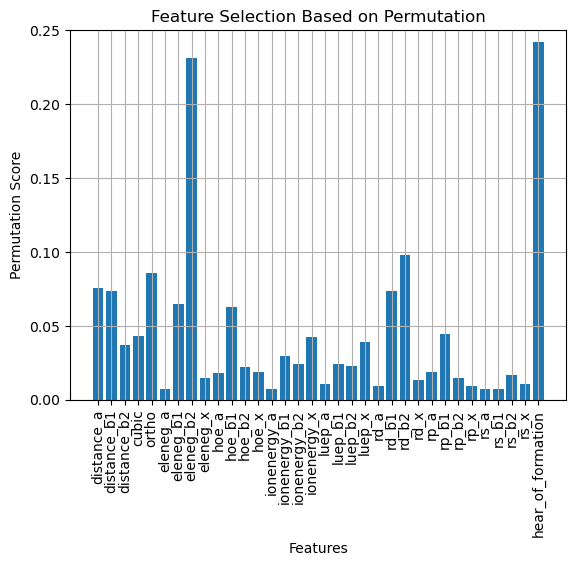

In [910]:
plt.bar(names.astype('str'), permutation)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Permutation")
plt.xlabel("Features")
plt.ylabel("Permutation Score")
plt.ylim(0,0.25)
plt.show()

In [911]:
new_feature = ['hear_of_formation', 'eleneg_b2', 'ortho','rd_b2', 'rd_b1', 'hoe_b1','distance_a','distance_b1','ionenergy_x',
               'distance_b2', 'cubic', 'eleneg_b1', 'hoe_b1','ionenergy_b1','ionenergy_b2','rp_b1','ind_gap']
df_permutation = df[new_feature]
df_permutation

,hear_of_formation,eleneg_b2,ortho,rd_b2,rd_b1,hoe_b1,distance_a,distance_b1,ionenergy_x,distance_b2,cubic,eleneg_b1,hoe_b1,ionenergy_b1,ionenergy_b2,rp_b1,ind_gap
0,-0.683406,-1.552769,-1.0,-1.636447,0.08247,-0.362743,-0.324756,-0.256802,0.067642,-1.004080,1.0,-0.408622,-0.362743,0.235396,-0.834750,0.620869,0.140693
1,0.288188,1.413974,-1.0,-0.592623,0.08247,-0.362743,-0.100284,-0.484212,0.067642,-0.353381,1.0,-0.408622,-0.362743,0.235396,1.691556,0.620869,-0.160657
2,-0.276088,0.581204,-1.0,1.313198,0.08247,-0.362743,0.447536,-0.490168,0.067642,0.562698,1.0,-0.408622,-0.362743,0.235396,0.028677,0.620869,0.278282
3,-0.137212,-0.511807,-1.0,-0.491608,0.08247,-0.362743,-0.257259,-0.385504,0.067642,-0.734395,1.0,-0.408622,-0.362743,0.235396,-0.825782,0.620869,-1.115829
4,-0.351901,-0.667951,-1.0,0.787919,0.08247,-0.362743,0.066276,-0.434871,0.067642,-0.132535,1.0,-0.408622,-0.362743,0.235396,-0.967217,0.620869,-0.893485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,1.132575,1.413974,1.0,-0.592623,0.81345,1.201084,0.350837,1.953509,-1.257164,0.670962,-1.0,0.007567,1.201084,-0.949413,1.691556,-0.277757,0.178606
536,0.583470,0.581204,1.0,1.313198,0.81345,1.201084,0.599748,2.147157,-1.257164,1.675255,-1.0,0.007567,1.201084,-0.949413,0.028677,-0.277757,0.116600
537,0.863737,-0.511807,1.0,-0.491608,0.81345,1.201084,0.301712,2.019769,-1.257164,0.399288,-1.0,0.007567,1.201084,-0.949413,-0.825782,-0.277757,-0.170808
538,0.595422,-0.667951,1.0,0.787919,0.81345,1.201084,0.438001,2.101512,-1.257164,1.002972,-1.0,0.007567,1.201084,-0.949413,-0.967217,-0.277757,0.287210


In [912]:
df_p=np.array(df_permutation)
data_train_p, data_test_p = train_test_split(df_p, test_size=0.1, random_state=0)
x_test_p=data_test_p[:,:(16)]
x_train_p=data_train_p[:,:(16)]
y_test_p=data_test_p[:,(16)]
y_train_p=data_train_p[:,(16)]

print(x_test_p.shape)
print(y_test_p.shape)
print(y_train_p.shape)
print(x_train_p.shape)

(54, 16)
(54,)
(486,)
(486, 16)


In [913]:
#'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'
mlp_hw_p = MLPRegressor(solver='adam',hidden_layer_sizes=(50,100,50),activation='relu',alpha=0.05,
                     tol=1e-6,max_iter=5000,learning_rate='constant',
                     learning_rate_init=0.01,random_state=120)
mlp_hw_p.fit(x_train_p, y_train_p)
pred_train_p = mlp_hw_p.predict(x_train_p)
mlp_pred_p = mlp_hw_p.predict((x_test_p))

print("Model evaluation - Test Set:")
print('r^2:',r2_score(y_test_p, mlp_pred_p))
print('RMSE', mean_squared_error(y_test_p, mlp_pred_p))
print('RAE', mean_absolute_error(y_test_p, mlp_pred_p))
print('RME:',np.sqrt(mean_squared_error(y_test_p,mlp_pred_p)))
RMSE_MLP_p = mean_squared_error(y_test_p, mlp_pred_p)
R_MLP_p = r2_score(y_test_p, mlp_pred_p)
RME_MLP_p = np.sqrt(mean_squared_error(y_test_p,mlp_pred_p))

Model evaluation - Test Set:
r^2: 0.9626330673943511
RMSE 0.028031801187526975
RAE 0.10344931177976753
RME: 0.16742700256388446


# Comparison - Model Evaluation

In [914]:
def bar (method, output, t):
  plt.bar(method,output, color = ['r','g','r','g'])
  plt.title(t)
  plt.plot()

In [915]:
names = np.array(['GBR', 'SVR', 'RF', 'MLP'])
r2 = np.array([R_GBR, R_SVR, R_RF,R_MLP])
rmse = np.array([RMSE_GBR, RMSE_SVR, RMSE_RF,RMSE_MLP])
rme = np.array([RME_GBR, RME_SVR, RME_RF,RME_MLP])
titles = np.array(['Comparison R^2', 'Comparison MSE', 'Comparison RMSE'])

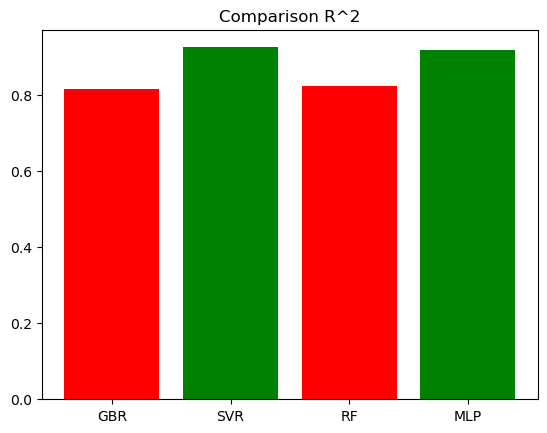

In [916]:
bar(names, r2,titles[0])

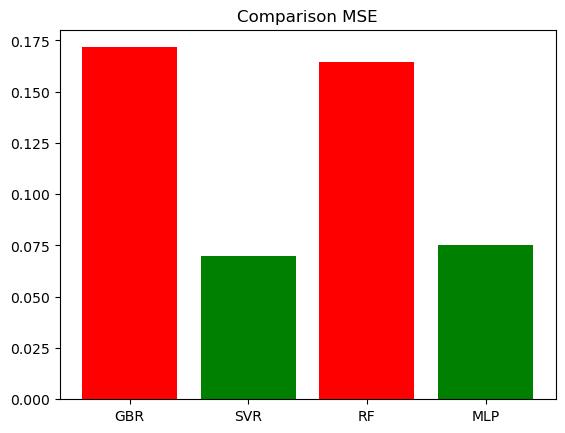

In [917]:
bar(names, rmse,titles[1])

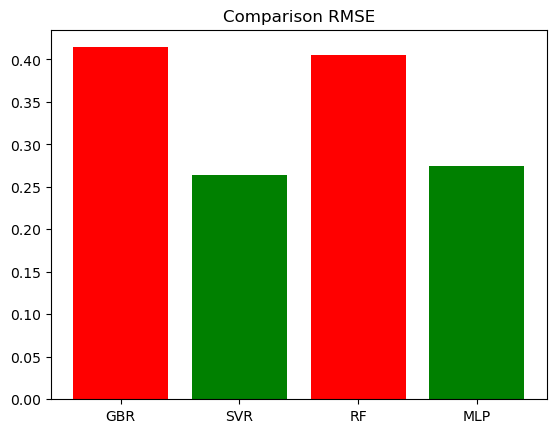

In [918]:
bar(names, rme,titles[2])

# Comparison - Model MLP Evaluation Based on Feature Selection

In [919]:
names = np.array(['Full Features', 'Lasso', 'KBest', 'Permutation'])
r2 = np.array([R_MLP,R_MLPcut_Lasso,R_MLP_kbes,R_MLP_p])
rmse = np.array([RMSE_MLP,RMSE_MLP_Lasso,RMSE_MLP_kbes,RMSE_MLP_p])
rme = np.array([RME_MLP,RME_MLPcut_Lasso,RME_MLP_kbes,RME_MLP_p])
titles = np.array(['Comparison R^2 on MLP', 'Comparison MSE on MLP', 'Comparison RMSE on MLP'])

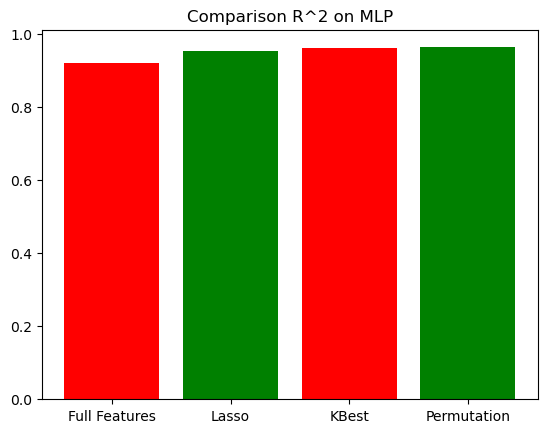

In [920]:
bar(names, r2,titles[0])

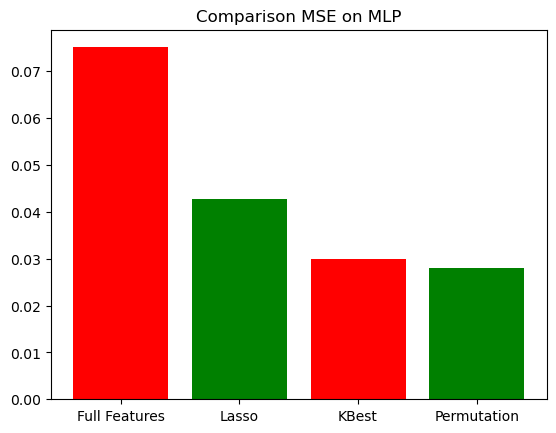

In [921]:
bar(names, rmse,titles[1])

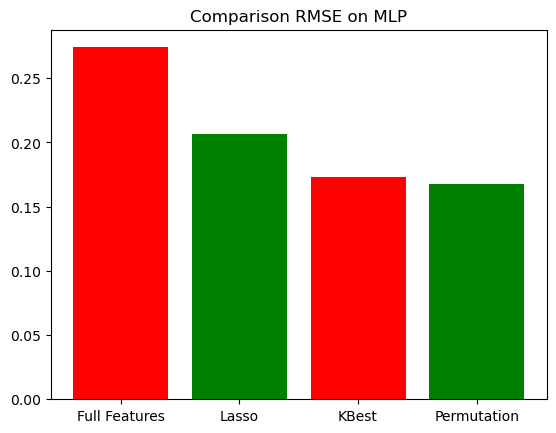

In [922]:
bar(names, rme,titles[2])

# Comparison - Features

In [923]:
feature_p = np.array(new_feature[:-1]).astype('object')
feature_lasso = feature_subset
feature_kbes = np.array(col[cols_id])

feature_score_p = []
feature_score_lasso = []
feature_score_kbes = []

In [924]:
feature_lasso

array(['distance_b1', 'distance_b2', 'cubic', 'eleneg_b1', 'eleneg_b2',
       'eleneg_x', 'hoe_a', 'hoe_b2', 'ionenergy_b1', 'ionenergy_b2',
       'rd_b2', 'rp_b1', 'rp_b2', 'rp_x', 'rs_b1', 'hear_of_formation'],
      dtype=object)

In [925]:
feature_p

array(['hear_of_formation', 'eleneg_b2', 'ortho', 'rd_b2', 'rd_b1',
       'hoe_b1', 'distance_a', 'distance_b1', 'ionenergy_x',
       'distance_b2', 'cubic', 'eleneg_b1', 'hoe_b1', 'ionenergy_b1',
       'ionenergy_b2', 'rp_b1'], dtype=object)

In [926]:
feature_kbes

array(['distance_a', 'distance_b1', 'distance_b2', 'cubic', 'ortho',
       'eleneg_b1', 'eleneg_b2', 'hoe_b1', 'ionenergy_b1', 'luep_b1',
       'luep_b2', 'rd_b1', 'rd_b2', 'rp_b1', 'rs_b1', 'hear_of_formation'],
      dtype=object)

In [927]:
#Venn diagram
feature_lasso = set(feature_lasso)
feature_p = set(feature_p)
feature_kbes = set(feature_kbes)

common = feature_lasso&feature_p&feature_kbes
lasso_p = (feature_lasso&feature_p)-common
lasso_kbes  = (feature_lasso&feature_kbes)-common
p_kbes = (feature_p&feature_kbes)-common
lasso_stand_in = feature_lasso - lasso_p - lasso_kbes - common
p_stand_in = feature_p - lasso_p - p_kbes - common
kbes_stand_in = feature_kbes - lasso_kbes - p_kbes -common

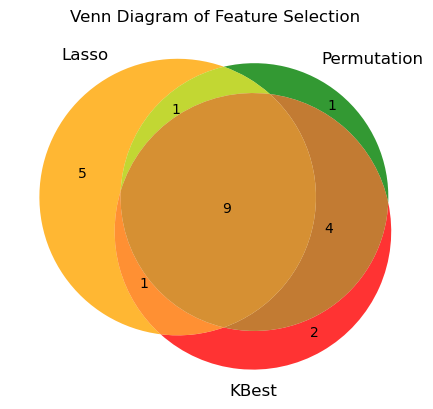

In [928]:
venn3(subsets =(len(lasso_stand_in),len(p_stand_in),len(lasso_p),len(kbes_stand_in),
                len(lasso_kbes),len(p_kbes),len(common)),
                set_labels=('Lasso', 'Permutation', 'KBest'),  
                set_colors=("orange", "green", "red"), alpha=0.8) 
            
plt.title("Venn Diagram of Feature Selection") 
plt.show()

# Comparison - Prediction Vs Testing (Full Features)

In [929]:
t = np.array(['GBR : Comparisons of Prediction and Actual Data',
              'SVR : Comparisons of Prediction and Actual Data',
             'RF : Comparisons of Prediction and Actual Data',
             'MLP : Comparisons of Prediction and Actual Data'])

def scatter(predictions, testing,t):
    plt.ylabel("Predicted Energy Bandgap")
    plt.xlabel("Double Halide Perovskite Samples")
    plt.plot(predictions,color = 'r')
    plt.plot(testing,color = 'b',alpha=0.6)
    plt.title(t)
    plt.legend(['prediction','actual'])

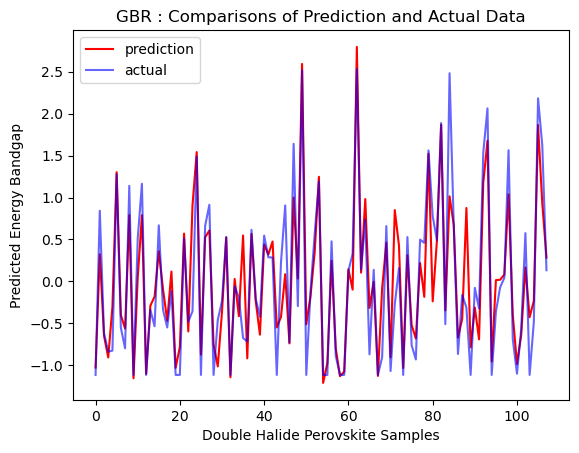

In [930]:
scatter(gbr_test_pred,y_test,t[0])

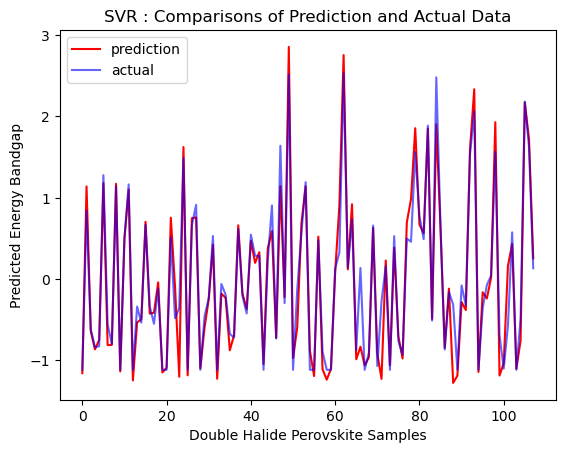

In [931]:
scatter(svr_test_pred_9,y_test,t[1])

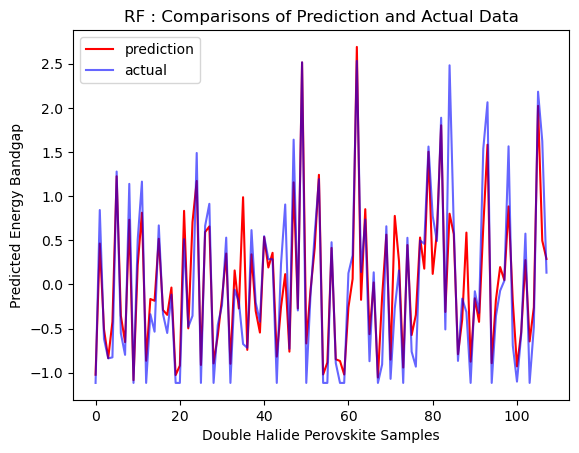

In [932]:
scatter(rf_test_pred9,y_test,t[2])

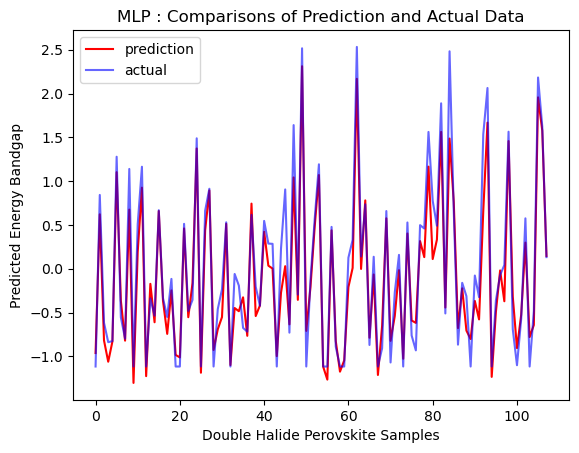

In [933]:
scatter(mlp_pred,y_test,t[3])

# Features Selection : 9 Features Picked by 3 Selectors

In [934]:
i=0
common_l = list(common)
while i < (len(common)):
    print(common_l[i])
    i+=1


eleneg_b2
rp_b1
rd_b2
ionenergy_b1
eleneg_b1
distance_b1
distance_b2
cubic
hear_of_formation


In [935]:
df_unite = df[common_l]
df_target = df['ind_gap']
df_unite = pd.concat([df_unite,df_target],axis=1)
df_unite

,eleneg_b2,rp_b1,rd_b2,ionenergy_b1,eleneg_b1,distance_b1,distance_b2,cubic,hear_of_formation,ind_gap
0,-1.552769,0.620869,-1.636447,0.235396,-0.408622,-0.256802,-1.004080,1.0,-0.683406,0.140693
1,1.413974,0.620869,-0.592623,0.235396,-0.408622,-0.484212,-0.353381,1.0,0.288188,-0.160657
2,0.581204,0.620869,1.313198,0.235396,-0.408622,-0.490168,0.562698,1.0,-0.276088,0.278282
3,-0.511807,0.620869,-0.491608,0.235396,-0.408622,-0.385504,-0.734395,1.0,-0.137212,-1.115829
4,-0.667951,0.620869,0.787919,0.235396,-0.408622,-0.434871,-0.132535,1.0,-0.351901,-0.893485
...,...,...,...,...,...,...,...,...,...,...
535,1.413974,-0.277757,-0.592623,-0.949413,0.007567,1.953509,0.670962,-1.0,1.132575,0.178606
536,0.581204,-0.277757,1.313198,-0.949413,0.007567,2.147157,1.675255,-1.0,0.583470,0.116600
537,-0.511807,-0.277757,-0.491608,-0.949413,0.007567,2.019769,0.399288,-1.0,0.863737,-0.170808
538,-0.667951,-0.277757,0.787919,-0.949413,0.007567,2.101512,1.002972,-1.0,0.595422,0.287210
